## Assignment 5: DA5401

#### Name: Karan Kishore
#### Roll number: DA25D400



In [1]:
!pip install liac-arff

  Preparing metadata (setup.py) ... done
  Created wheel for liac-arff: filename=liac_arff-2.5.0-py3-none-any.whl size=11717 sha256=c9174818036de767cb5e36ea359277883781acb25b38b7a73a2aeb7e0d441002
  Stored in directory: /root/.cache/pip/wheels/a9/ac/cf/c2919807a5c623926d217c0a18eb5b457e5c19d242c3b5963a
Successfully built liac-arff


In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import arff   # from liac-arff (pip install liac-arff)
from sklearn.preprocessing import StandardScaler


In [3]:
data_path = "yeast.arff"
num_labels = 14
rnd_seed = 42
np.random.seed(rnd_seed)

In [4]:
def load_dataset(data_path):
    with open(data_path, 'r') as f:
        arff_data = arff.load(f)
    attrs = [a[0] for a in arff_data['attributes']]
    df = pd.DataFrame(arff_data['data'], columns=attrs)
    return df, attrs

df, attrs = load_dataset(data_path)
print(df.head())

if len(attrs) < num_labels + 1:
    raise ValueError("Number of attributes is less than number of labels + 1")
label_cols = attrs[-num_labels:]
feature_cols = attrs[:-num_labels]

X = df[feature_cols].astype(float).copy()
Y = df[label_cols].copy()

Y = Y.applymap(lambda v: int(float(v))) # Convert to int(0/1) from strings ('0'/'1') if any
print("Shape of features: ", X.shape, "\n", "Shape of labels: ", Y.shape)

       Att1      Att2      Att3      Att4      Att5      Att6      Att7  \
0  0.004168 -0.170975 -0.156748 -0.142151  0.058781  0.026851  0.197719   
1 -0.103956  0.011879 -0.098986 -0.054501 -0.007970  0.049113 -0.030580   
2  0.509949  0.401709  0.293799  0.087714  0.011686 -0.006411 -0.006255   
3  0.119092  0.004412 -0.002262  0.072254  0.044512 -0.051467  0.074686   
4  0.042037  0.007054 -0.069483  0.081015 -0.048207  0.089446 -0.004947   

       Att8      Att9     Att10  ...  Class5  Class6  Class7  Class8  Class9  \
0  0.041850  0.066938 -0.056617  ...       0       0       1       1       0   
1 -0.077933 -0.080529 -0.016267  ...       0       0       0       0       0   
2  0.013646 -0.040666 -0.024447  ...       0       0       0       0       0   
3 -0.007670  0.079438  0.062184  ...       0       0       0       0       0   
4  0.064456 -0.133387  0.068878  ...       1       1       0       0       0   

   Class10  Class11  Class12  Class13  Class14  
0        0        0

/tmp/ipython-input-1957204499.py:19: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  Y = Y.applymap(lambda v: int(float(v))) # Convert to int(0/1) from strings ('0'/'1') if any


#### Do some visualization to observe the distribution of label counts

In [5]:
X.head()

,Att1,Att2,Att3,Att4,Att5,Att6,Att7,Att8,Att9,Att10,...,Att94,Att95,Att96,Att97,Att98,Att99,Att100,Att101,Att102,Att103
0,0.004168,-0.170975,-0.156748,-0.142151,0.058781,0.026851,0.197719,0.041850,0.066938,-0.056617,...,0.006166,-0.012976,-0.014259,-0.015024,-0.010747,0.000411,-0.032056,-0.018312,0.030126,0.124722
1,-0.103956,0.011879,-0.098986,-0.054501,-0.007970,0.049113,-0.030580,-0.077933,-0.080529,-0.016267,...,0.007680,0.027719,-0.085811,0.111123,0.050541,0.027565,-0.063569,-0.041471,-0.079758,0.017161
2,0.509949,0.401709,0.293799,0.087714,0.011686,-0.006411,-0.006255,0.013646,-0.040666,-0.024447,...,0.096277,-0.044932,-0.089470,-0.009162,-0.012010,0.308378,-0.028053,0.026710,-0.066565,-0.122352
3,0.119092,0.004412,-0.002262,0.072254,0.044512,-0.051467,0.074686,-0.007670,0.079438,0.062184,...,-0.083809,0.200354,-0.075716,0.196605,0.152758,-0.028484,-0.074207,-0.089227,-0.049913,-0.043893
4,0.042037,0.007054,-0.069483,0.081015,-0.048207,0.089446,-0.004947,0.064456,-0.133387,0.068878,...,-0.060467,0.044351,-0.057209,0.028047,0.029661,-0.050026,0.023248,-0.061539,-0.035160,0.067834


In [6]:
Y.head()

,Class1,Class2,Class3,Class4,Class5,Class6,Class7,Class8,Class9,Class10,Class11,Class12,Class13,Class14
0,0,0,0,0,0,0,1,1,0,0,0,1,1,0
1,0,0,1,1,0,0,0,0,0,0,0,0,0,0
2,0,1,1,0,0,0,0,0,0,0,0,1,1,0
3,0,0,1,1,0,0,0,0,0,0,0,0,0,0
4,0,0,1,1,1,1,0,0,0,0,0,0,0,0


### We proceed by finding the most frequent class
1) Counting single as well as multi-label instances (eg:- All samples that contain A regardless of other classes co-occur. (eg: - A is counted even in B and C are also associated with same sample))
2) When counting single-label instances only (eg:- Only Class A, only class B and so on)

Label counts (inclusive):
 Class12    1816
Class13    1799
Class2     1038
Class3      983
Class4      862
Class1      762
dtype: int64
Label counts (single-label instances only):
 Class1    32
Class2     0
Class3     0
Class4     0
Class5     0
Class6     0
dtype: int64


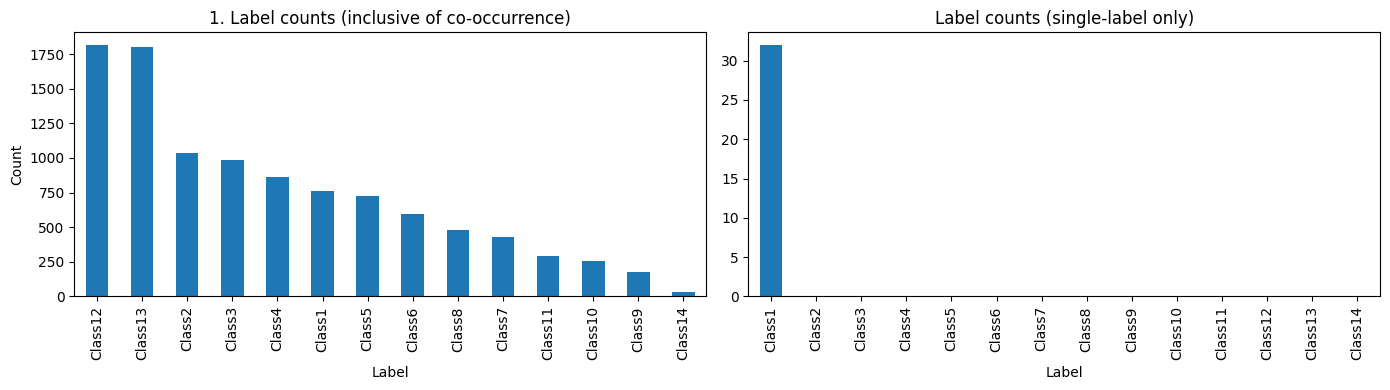

In [7]:
label_sums_inclusive = Y.sum(axis=0).sort_values(ascending=False)
single_laebl_mask = (Y.sum(axis = 1) == 1)
label_sums_single = Y[single_laebl_mask].sum(axis=0).sort_values(ascending=False)
print("Label counts (inclusive):\n", label_sums_inclusive.head(6))
print("Label counts (single-label instances only):\n", label_sums_single.head(6))

plt.figure(figsize=(14,4))
plt.subplot(1,2,1)
label_sums_inclusive.plot(kind='bar')
plt.title("1. Label counts (inclusive of co-occurrence)")
plt.xlabel("Label")
plt.ylabel("Count")
plt.subplot(1,2,2)
label_sums_single.plot(kind='bar')
plt.title("Label counts (single-label only)")
plt.xlabel("Label")
plt.tight_layout()
plt.show()

### Analysis of class label VS frequency/count graph
- When we consider single-label only, only Class 1 has frequency of 32, rest of the classes from 2 to 14 have no single class occurences across all the samples.
- When label counts are inclusive of co-occurence, we can see that class 12 and 13 have the highest frquency, both of them being almost equal. This makes us suspect whether they are related or not which can be confirmed using correlation analysis. Moreover, class 1, which was the only class with single-label count has co-occurence inclusive count of 762. This can is not too less compared to the Classes 2,3 and 4.

### What can we infer?
- We cannot possibly rely completely on the multiple classes assigned to the same sample due to possible presence of noisy samples. However, sincce the single-class only counts is only present for class 1 and we need to choose the **two most frequent single-label classes**, we need to use the co-occurence counts too while **not ignoring the single class counts as class 1 also has a not too low co-occurence count**. As of now, choosing class 1 and class 12 is a good choice here as we balance out the noise factor and also include single-class counts which are less noisy as it a single class is assigned to those samples.

- We can confirm this with a correlation plot to see, why we don't choose, say class 12 or 13 and it is highly possible that they are correalated given their similar counts and difference compared to rest of the classes. So taking any one of them can be a good feature in itself.


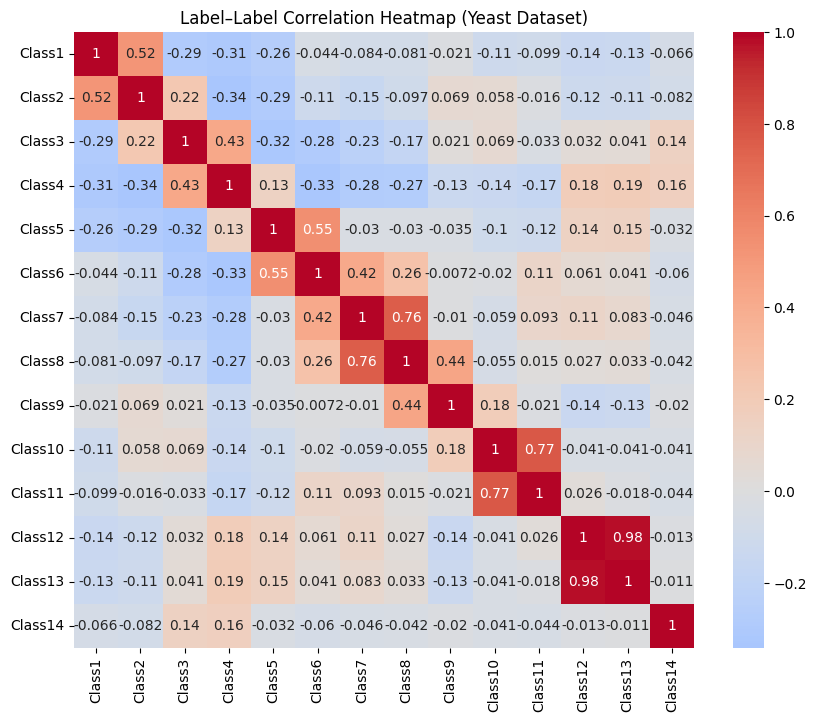


Top label correlations:
Class12  Class13    0.981523
Class10  Class11    0.773712
Class7   Class8     0.755266
Class5   Class6     0.550559
Class1   Class2     0.515855
Class8   Class9     0.439346
Class3   Class4     0.428023
Class6   Class7     0.415379
         Class8     0.260770
Class2   Class3     0.224337
dtype: float64


In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation among the 14 label columns
corr = Y.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title("Label–Label Correlation Heatmap (Yeast Dataset)")
plt.show()

# Optional: print strongest correlations
corr_pairs = (
    corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))
    .stack()
    .sort_values(ascending=False)
)
print("\nTop label correlations:")
print(corr_pairs.head(10))


### The above plot shows a high correlation of ~ 0.98 between classes 12 and 13, suggesting a good linear relation between them. Since they also occur in fairly large number of samples, picking any **one** of them can be good.

- Just to be sure, we also plot the graph showing the **"class group sizes per class label for classes 1, 2 and 3"** to see whether they co-occur with say, very large group (>6 for instance) and not be associated with samples with too many classes assigned to them.

Label participation counts by group size:
        1    2   3    4    5    6   7   8   9   10  11
Class1  32  131  85  219   52  157  55  27   4   0   0
Class2   0  199  19  361   86  235  73  51   9   4   1
Class3   0  121  32  401  130  213  40  33   8   4   1
Class4   0   66  24  493  104  136  24  11   4   0   0
Class5   0   52   4  385   27  177  35  29   8   4   1


<Figure size 800x500 with 0 Axes>

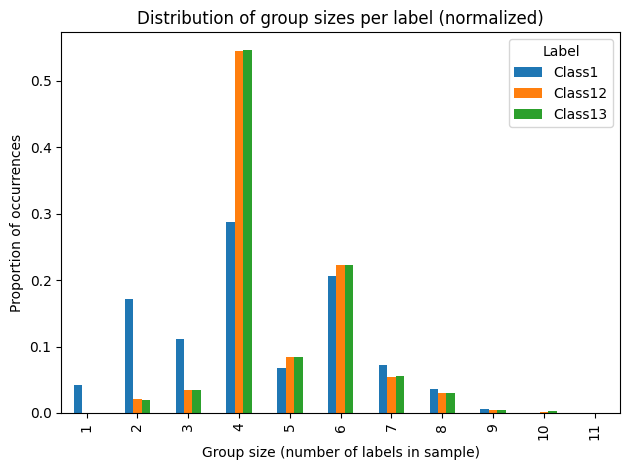

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Compute label participation by group size
group_sizes = Y.sum(axis=1)  # number of labels per sample
label_participation = pd.DataFrame(0, index=label_cols, columns=sorted(group_sizes.unique()))

for lbl in label_cols:
    for k in sorted(group_sizes.unique()):
        label_participation.loc[lbl, k] = ((Y[lbl] == 1) & (group_sizes == k)).sum()

# Normalize by total occurrences per label (optional)
label_participation_norm = label_participation.div(label_participation.sum(axis=1), axis=0)

print("Label participation counts by group size:")
print(label_participation.head())

# Plot for a few key labels (Class1, Class12, Class13)
subset_labels = ['Class1', 'Class12', 'Class13']
plt.figure(figsize=(8,5))
label_participation_norm.loc[subset_labels].T.plot(kind='bar')
plt.title("Distribution of group sizes per label (normalized)")
plt.xlabel("Group size (number of labels in sample)")
plt.ylabel("Proportion of occurrences")
plt.legend(title="Label")
plt.tight_layout()
plt.show()


The above graph shows a characteristic peak at group size = 4 (number of class labels per sample where that particular class label is associated with). This is also true for class 1 which has a few single-class only samples.

#### This further shows that the classes 12 and 13 majorly occur in group sizes < 6. So, they are not associated majorly with samples with a too large group size as that may increase the probability that the classification may just be a noise.

Now, proceed with **most frequent multi-label combination**


Top multi-label combinations (combo -> count, size):
('Class12', 'Class13', 'Class3', 'Class4')  -> 237  (size=4)  frac=0.098
('Class12', 'Class13', 'Class4', 'Class5')  -> 233  (size=4)  frac=0.096
('Class1', 'Class12', 'Class13', 'Class2')  -> 172  (size=4)  frac=0.071
('Class1', 'Class2')  -> 131  (size=2)  frac=0.054
('Class12', 'Class13', 'Class2', 'Class3')  -> 117  (size=4)  frac=0.048
('Class12', 'Class13', 'Class5', 'Class6')  -> 105  (size=4)  frac=0.043
('Class12', 'Class13', 'Class7', 'Class8')  -> 75  (size=4)  frac=0.031
('Class2', 'Class3')  -> 68  (size=2)  frac=0.028
('Class12', 'Class13', 'Class5', 'Class6', 'Class7', 'Class8')  -> 60  (size=6)  frac=0.025
('Class1', 'Class12', 'Class13')  -> 59  (size=3)  frac=0.024


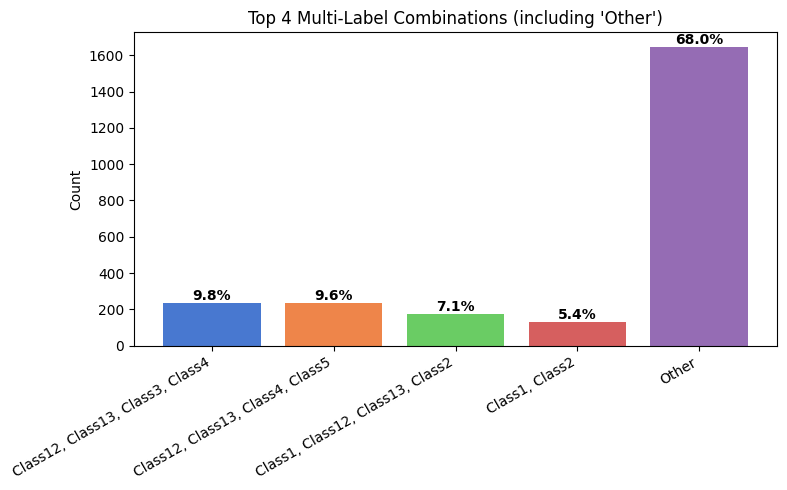

In [12]:
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Make sure label_cols is defined: a list of label column names in Y
# For example: label_cols = Y.columns.tolist()

def row_to_label_tuple(row):
    """
    Convert a row of binary labels (0/1) into a sorted tuple of label names present.
    Example: if row = [1,0,1] and label_cols = ['Class1','Class2','Class3'], returns ('Class1','Class3')
    """
    present = [label_cols[i] for i, val in enumerate(row) if int(val) == 1]
    return tuple(sorted(present))

n = Y.shape[0]

# Make sure label_cols is defined: list of label column names in Y
label_cols = Y.columns.tolist()

# --- Count all label combinations ---
combo_counter = Counter()
for idx, row in Y.iterrows():
    combo = row_to_label_tuple(row)
    combo_counter[combo] += 1

# Remove empty combo if present
combo_counter.pop((), None)

# --- Sort and list top combos ---
top_combos = combo_counter.most_common(20)
print("\nTop multi-label combinations (combo -> count, size):")
for combo, cnt in top_combos[:10]:
    print(f"{combo}  -> {cnt}  (size={len(combo)})  frac={cnt/n:.3f}")

# --- Build dataframe for top 4 + 'Other' ---
top_k = 4
top_df = pd.DataFrame(top_combos[:top_k], columns=["Combo", "Count"])
top_df["Combo_str"] = top_df["Combo"].apply(lambda x: ", ".join(x))

# Compute 'Other' as remainder
other_count = n - top_df["Count"].sum()
top_df = pd.concat([
    top_df,
    pd.DataFrame([{"Combo": ("Other",), "Count": other_count, "Combo_str": "Other"}])
], ignore_index=True)

# Add percentage of total
top_df["Percent"] = 100 * top_df["Count"] / n

# --- Plot ---
plt.figure(figsize=(8,5))
bars = plt.bar(top_df["Combo_str"], top_df["Count"],
               color=sns.color_palette("muted", len(top_df)))

plt.title(f"Top {top_k} Multi-Label Combinations (including 'Other')")
plt.ylabel("Count")
plt.xticks(rotation=30, ha='right')

# Annotate bars with % of total
for bar, pct in zip(bars, top_df["Percent"]):
    plt.text(bar.get_x() + bar.get_width()/2,
             bar.get_height(),
             f"{pct:.1f}%",
             ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()


#### So, we finally choose class 1 for the single class case and the top 3 combos as they comprise of 237, 233 and 172 samples occuring with that group of classes combination.

#### Note that provided 14 classes, the probability of a single combination is extremely small, and such a pattern can't be ignored. So we use them for further analysis with t-SNE and isomap.

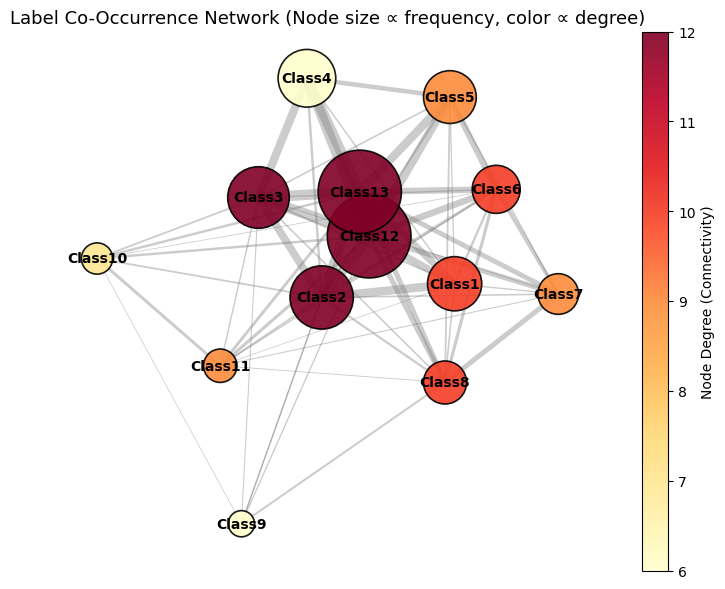

In [13]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# --- Recompute or reuse co-occurrence matrix ---
co_occ = (Y.T @ Y)
np.fill_diagonal(co_occ.values, 0)

# --- Build graph with edges above threshold ---
G = nx.Graph()
for i in co_occ.index:
    for j in co_occ.columns:
        w = co_occ.loc[i, j]
        if w > 50:  # threshold for edge visibility
            G.add_edge(i, j, weight=w)

# --- Node size proportional to label frequency (inclusive count) ---
label_freq = Y.sum(axis=0)
node_sizes = [label_freq[node]*2 for node in G.nodes()]  # scale factor for visibility

# --- Node color by degree (more connected = darker) ---
node_degrees = dict(G.degree())
node_colors = [node_degrees[n] for n in G.nodes()]

# --- Layout: increase 'k' to spread nodes further apart ---
plt.figure(figsize=(9, 7))
pos = nx.spring_layout(G, seed=42, k=1.8, iterations=100)

# --- Draw edges with proportional width ---
nx.draw_networkx_edges(
    G, pos,
    width=[d['weight']/100 for (_,_,d) in G.edges(data=True)],
    alpha=0.4, edge_color='gray'
)

# --- Draw nodes with scaled size & degree-based color ---
nodes = nx.draw_networkx_nodes(
    G, pos,
    node_size=node_sizes,
    node_color=node_colors,
    cmap='YlOrRd',
    alpha=0.9,
    linewidths=1.2,
    edgecolors='black'
)

# --- Add labels ---
nx.draw_networkx_labels(G, pos, font_size=10, font_weight='bold')

plt.title("Label Co-Occurrence Network (Node size ∝ frequency, color ∝ degree)", fontsize=13)
plt.axis('off')
plt.colorbar(nodes, label="Node Degree (Connectivity)")
plt.show()


The above graph is another way to show the importance of class 12 and 13 in the given dataset as their connectivity to other nodes is immense and dense.

Top multi-label combos (multi-label only):
 TopCombo_1: ('Class12', 'Class13', 'Class3', 'Class4') -> 237 (0.098)
 TopCombo_2: ('Class12', 'Class13', 'Class4', 'Class5') -> 233 (0.096)
 TopCombo_3: ('Class1', 'Class12', 'Class13', 'Class2') -> 172 (0.071)

New category distribution (counts and %):
                  Count  Percent
viz_category_new                
Other              1743    72.11
TopCombo_1          237     9.81
TopCombo_2          233     9.64
TopCombo_3          172     7.12
Class1               32     1.32


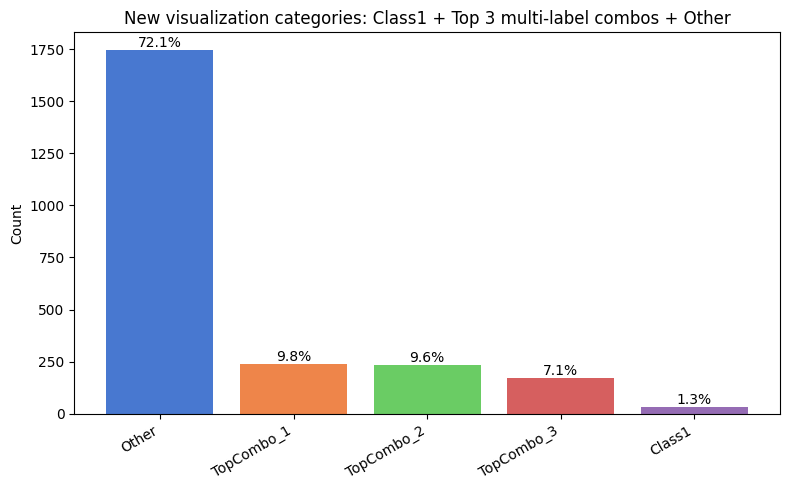


Saved new target variable and top 3 combos to folder: preprocessed/
 - viz_category_new.csv : the new categorical target (Class1 + Top3 + Other)
 - top3_multi_combos.csv : the top 3 multi-label combinations (for reference)


In [14]:
from collections import Counter
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --- Helper: convert a row (binary vector) to a sorted tuple of label names present ---
def row_to_label_tuple(row):
    present = [label_cols[i] for i, val in enumerate(row) if int(val) == 1]
    return tuple(sorted(present))

# --- Count all combos (including singletons) ---
combo_counter = Counter()
for idx, row in Y.iterrows():
    combo = row_to_label_tuple(row)
    combo_counter[combo] += 1

# Remove empty combo if present
combo_counter.pop((), None)

# --- Identify the top 3 multi-label combos (require length > 1) ---
multi_combos_sorted = [(c, cnt) for c, cnt in combo_counter.most_common() if len(c) > 1]
top_multi_k = 3
top_multi_combos = multi_combos_sorted[:top_multi_k]

# If there are fewer than 3 multi-label combos, take what's available
top_multi_combos = top_multi_combos[:max(0, min(top_multi_k, len(top_multi_combos)))]

print("Top multi-label combos (multi-label only):")
for i, (combo, cnt) in enumerate(top_multi_combos, 1):
    print(f" TopCombo_{i}: {combo} -> {cnt} ({cnt/n:.3f})")

# --- Build mapping for quick checks ---
top_combo_tuples = [tuple(sorted(c)) for c, _ in top_multi_combos]

# --- Build new categorical target:
# Priority:
#  1) exact single-label == "Class1" -> "Class1"
#  2) if exact combo equals one of the top 3 multi combos -> "TopCombo_i"
#  3) else -> "Other"
new_category = []
for idx, row in Y.iterrows():
    combo = row_to_label_tuple(row)
    # single exact Class1
    if len(combo) == 1 and combo[0] == "Class1":
        new_category.append("Class1")
        continue
    # check if matches any top multi combo exactly
    matched = False
    for i, topc in enumerate(top_combo_tuples, 1):
        if combo == topc:
            new_category.append(f"TopCombo_{i}")
            matched = True
            break
    if matched:
        continue
    # fallback
    new_category.append("Other")

viz_category_new = pd.Series(new_category, index=Y.index, name="viz_category_new")

# --- Summary counts & percentages ---
counts = viz_category_new.value_counts()
percents = 100 * counts / n
summary_df = pd.DataFrame({"Count": counts, "Percent": percents.round(2)})
print("\nNew category distribution (counts and %):")
print(summary_df)

# --- Bar plot (Top combos + Class1 + Other) ---
order = list(summary_df.sort_values("Count", ascending=False).index)  # sort by count for plotting
plt.figure(figsize=(8,5))
bars = plt.bar(order, summary_df.loc[order, "Count"], color=sns.color_palette("muted", len(order)))
plt.title("New visualization categories: Class1 + Top 3 multi-label combos + Other")
plt.ylabel("Count")
plt.xticks(rotation=30, ha='right')

# annotate with percent above bars
for bar, pct in zip(bars, summary_df.loc[order, "Percent"]):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f"{pct:.1f}%", ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

# --- Save for later use (optional) ---
viz_category = viz_category_new  # keep using the variable name you prefer
OUT_DIR = "preprocessed"
os.makedirs(OUT_DIR, exist_ok=True)

# Save the new visualization categories (and optionally the top combos)
viz_category_new.to_csv(os.path.join(OUT_DIR, "viz_category_new.csv"), index=False)

# Optionally save top combos info for reproducibility
pd.DataFrame(top_multi_combos, columns=["Combo", "Count"]).to_csv(
    os.path.join(OUT_DIR, "top3_multi_combos.csv"), index=False
)

print(f"\nSaved new target variable and top 3 combos to folder: {OUT_DIR}/")
print(" - viz_category_new.csv : the new categorical target (Class1 + Top3 + Other)")
print(" - top3_multi_combos.csv : the top 3 multi-label combinations (for reference)")

# np.save(os.path.join(OUT_DIR, "viz_category_new.npy"), viz_category.values)  # optional


In [29]:
from sklearn.preprocessing import StandardScaler

# Create the scaler and fit-transform the feature matrix
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Feature matrix standardized:")
print(f" - Shape: {X_scaled.shape}")
print(f" - Mean (approx): {X_scaled.mean():.2f}")
print(f" - Std (approx): {X_scaled.std():.2f}")

Feature matrix standardized:
 - Shape: (2417, 103)
 - Mean (approx): 0.00
 - Std (approx): 1.00


Why scaling is important before distance based dimensionality reduction

- Applying distance based dimensionality reduction (eg:- t-SNE) features in dataset may be measured on very different scales (like one column in millimeteres, other column in kilograms).

- Features with larger numerical ranges will have large effect on distance during computation.

- This can cause a distance based algorithm to overemphasize certain features and undervalue other features which may have shorter range but are still useful nevertheless. Like gold price has sharp increase with grams doesn't mean that shorter "value" means lesser distance.

- Projected value can then have scale bias, not the true structure of data. Thus, scaling ensures that all the features constribute fairly and transform each column with mean 0 and standard deviation 1. So, the distance in higher dimensional space are now "relative" and not raw magnitide, making the feature comparison meaningful.

## PART B: t-SNE and Veracity Inspection

t-SNE is a non-linear dimensionaity reduction technique that preserved local neighbourhood structure in a lower dimensional space. Perplexity is a hyperparameter here, which balances between local and global features of data.

- Low perplexity (like 5): focus on very local relationships, creating many clusters generally
- Moderate perplexity (e.g.: -  30): smoother, balanced clusters generated
- High perplexity (e.g.:- > 50): clusteres appear merged to emphasize global strcutre.

In [16]:
import numpy as np

# make sure X_scaled is a contiguous float64 array
X_scaled = np.ascontiguousarray(X_scaled, dtype=np.float64)

from sklearn.manifold import TSNE
tsne = TSNE(
    n_components=2,
    perplexity=30,
    learning_rate="auto",
    init="pca",
    method="barnes_hut",   # default for larger sets
    random_state=42,
    angle=0.5              # speed/accuracy tradeoff; lower -> more accurate, slower
)
tsne_embedded = tsne.fit_transform(X_scaled)
print("t-SNE completed, shape:", tsne_embedded.shape)


t-SNE completed, shape: (2417, 2)


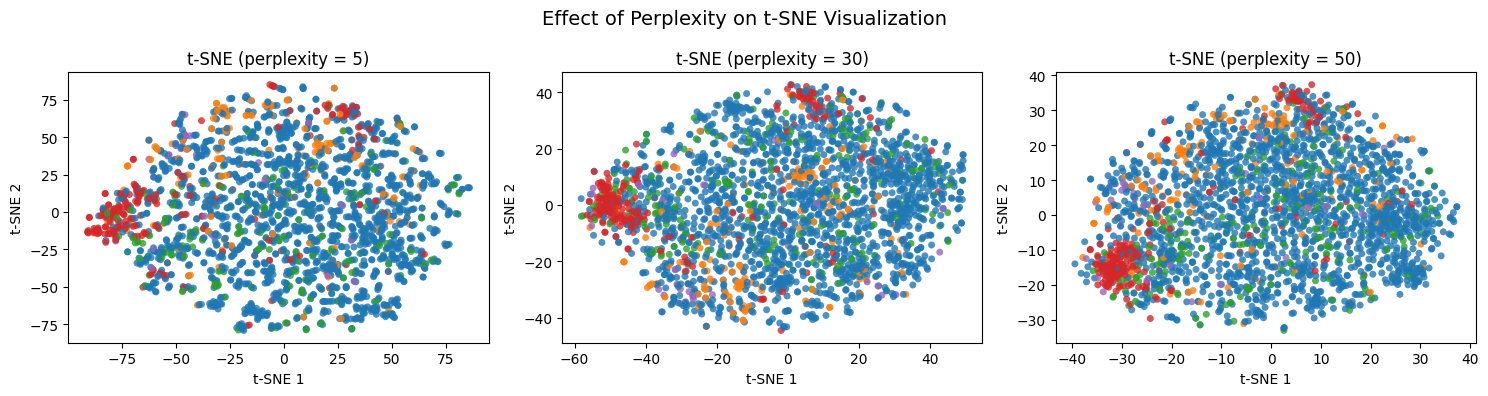

In [17]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

X_scaled = np.ascontiguousarray(X_scaled, dtype=np.float64)

perplexities = [5, 20, 30, 50]
tsne_results = {}

for p in perplexities:
    tsne = TSNE(
        n_components=2,
        perplexity=p,
        learning_rate="auto",
        init="pca",
        method="barnes_hut",
        random_state=42
    )
    tsne_embedded = tsne.fit_transform(X_scaled)
    tsne_results[p] = tsne_embedded

# --- Visual comparison ---
plt.figure(figsize=(15, 4))
for i, p in enumerate(perplexities, 1):
    plt.subplot(1, 3, i)
    sns.scatterplot(
        x=tsne_results[p][:, 0],
        y=tsne_results[p][:, 1],
        hue=viz_category,
        palette="tab10",
        s=25,
        alpha=0.8,
        edgecolor="none"
    )
    plt.title(f"t-SNE (perplexity = {p})")
    plt.xlabel("t-SNE 1")
    plt.ylabel("t-SNE 2")
    plt.legend([],[],frameon=False)  # hide legend for compactness
plt.suptitle("Effect of Perplexity on t-SNE Visualization", fontsize=14)
plt.tight_layout()
plt.show()


In [ ]:
X_scaled.shape

(2417, 103)

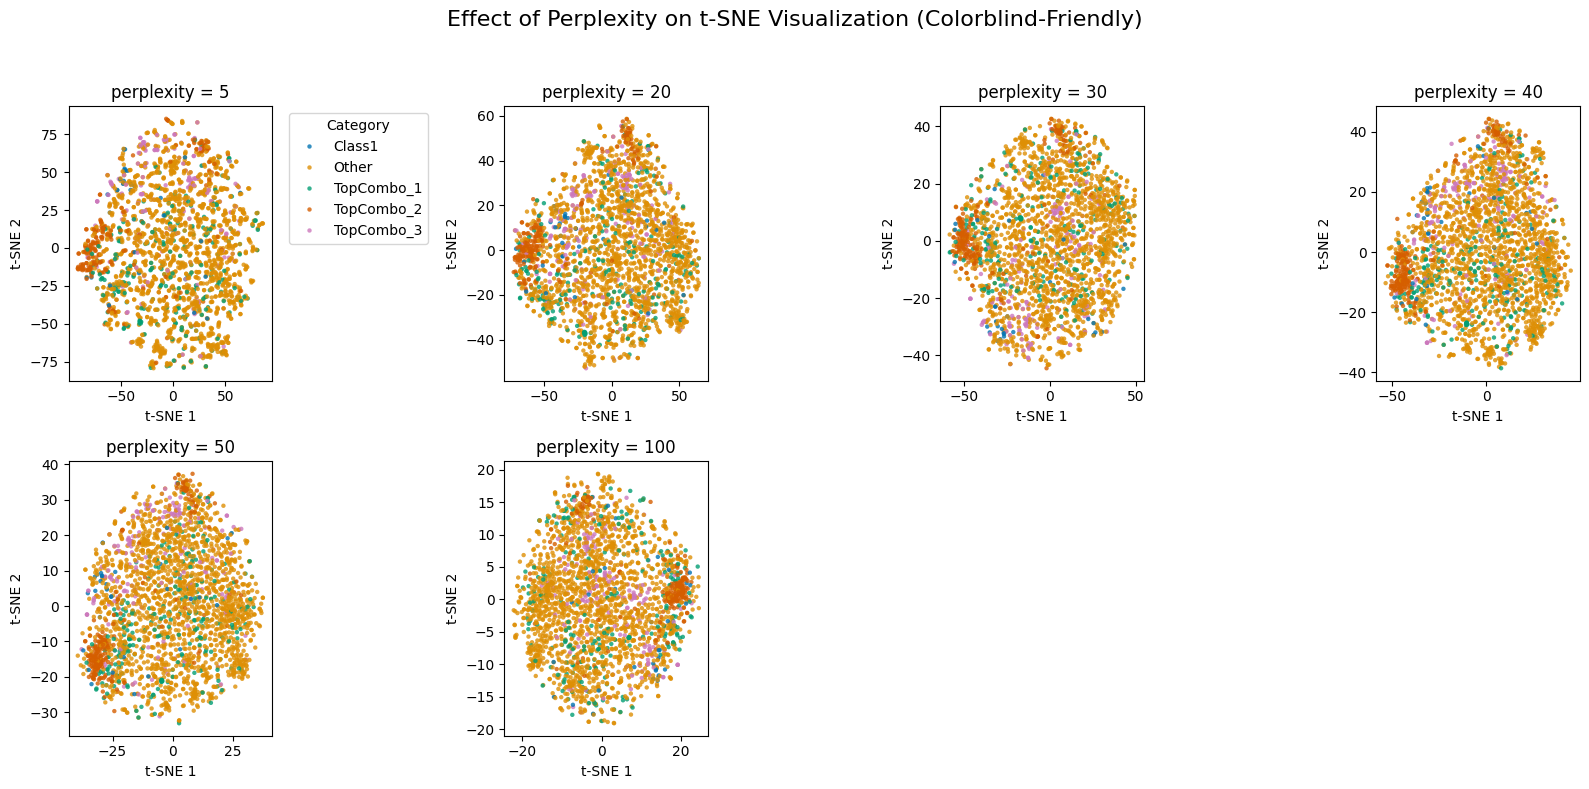

In [19]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math

# ensure X_scaled is contiguous float64
X_scaled = np.ascontiguousarray(X_scaled, dtype=np.float64)

# list of perplexities to compare
perplexities = [5, 20, 30, 40, 50, 100]
tsne_results = {}

# compute t-SNE embeddings for each perplexity
for p in perplexities:
    tsne = TSNE(
        n_components=2,
        perplexity=p,
        learning_rate="auto",
        init="pca",
        method="barnes_hut",
        random_state=42
    )
    tsne_embedded = tsne.fit_transform(X_scaled)
    tsne_results[p] = tsne_embedded

# --- Visual comparison ---
# determine subplot grid size
n_plots = len(perplexities)
cols = 4  # number of columns
rows = math.ceil(n_plots / cols)

# Choose colorblind-friendly palette
palette = sns.color_palette("colorblind", n_colors=len(viz_category.unique()))
category_order = sorted(viz_category.unique())  # ensures consistent color mapping

plt.figure(figsize=(4*cols, 4*rows))

for i, p in enumerate(perplexities, 1):
    plt.subplot(rows, cols, i)

    # small point size for dense data
    sns.scatterplot(
        x=tsne_results[p][:, 0],
        y=tsne_results[p][:, 1],
        hue=viz_category,
        palette=palette,
        s=10,              # smaller radius
        alpha=0.8,
        edgecolor="none",
        hue_order=category_order
    )
    plt.title(f"perplexity = {p}")
    plt.xlabel("t-SNE 1")
    plt.ylabel("t-SNE 2")
    if i == 1:
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title="Category")
    else:
        plt.legend([], [], frameon=False)  # hide legend for compactness

plt.suptitle("Effect of Perplexity on t-SNE Visualization (Colorblind-Friendly)", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


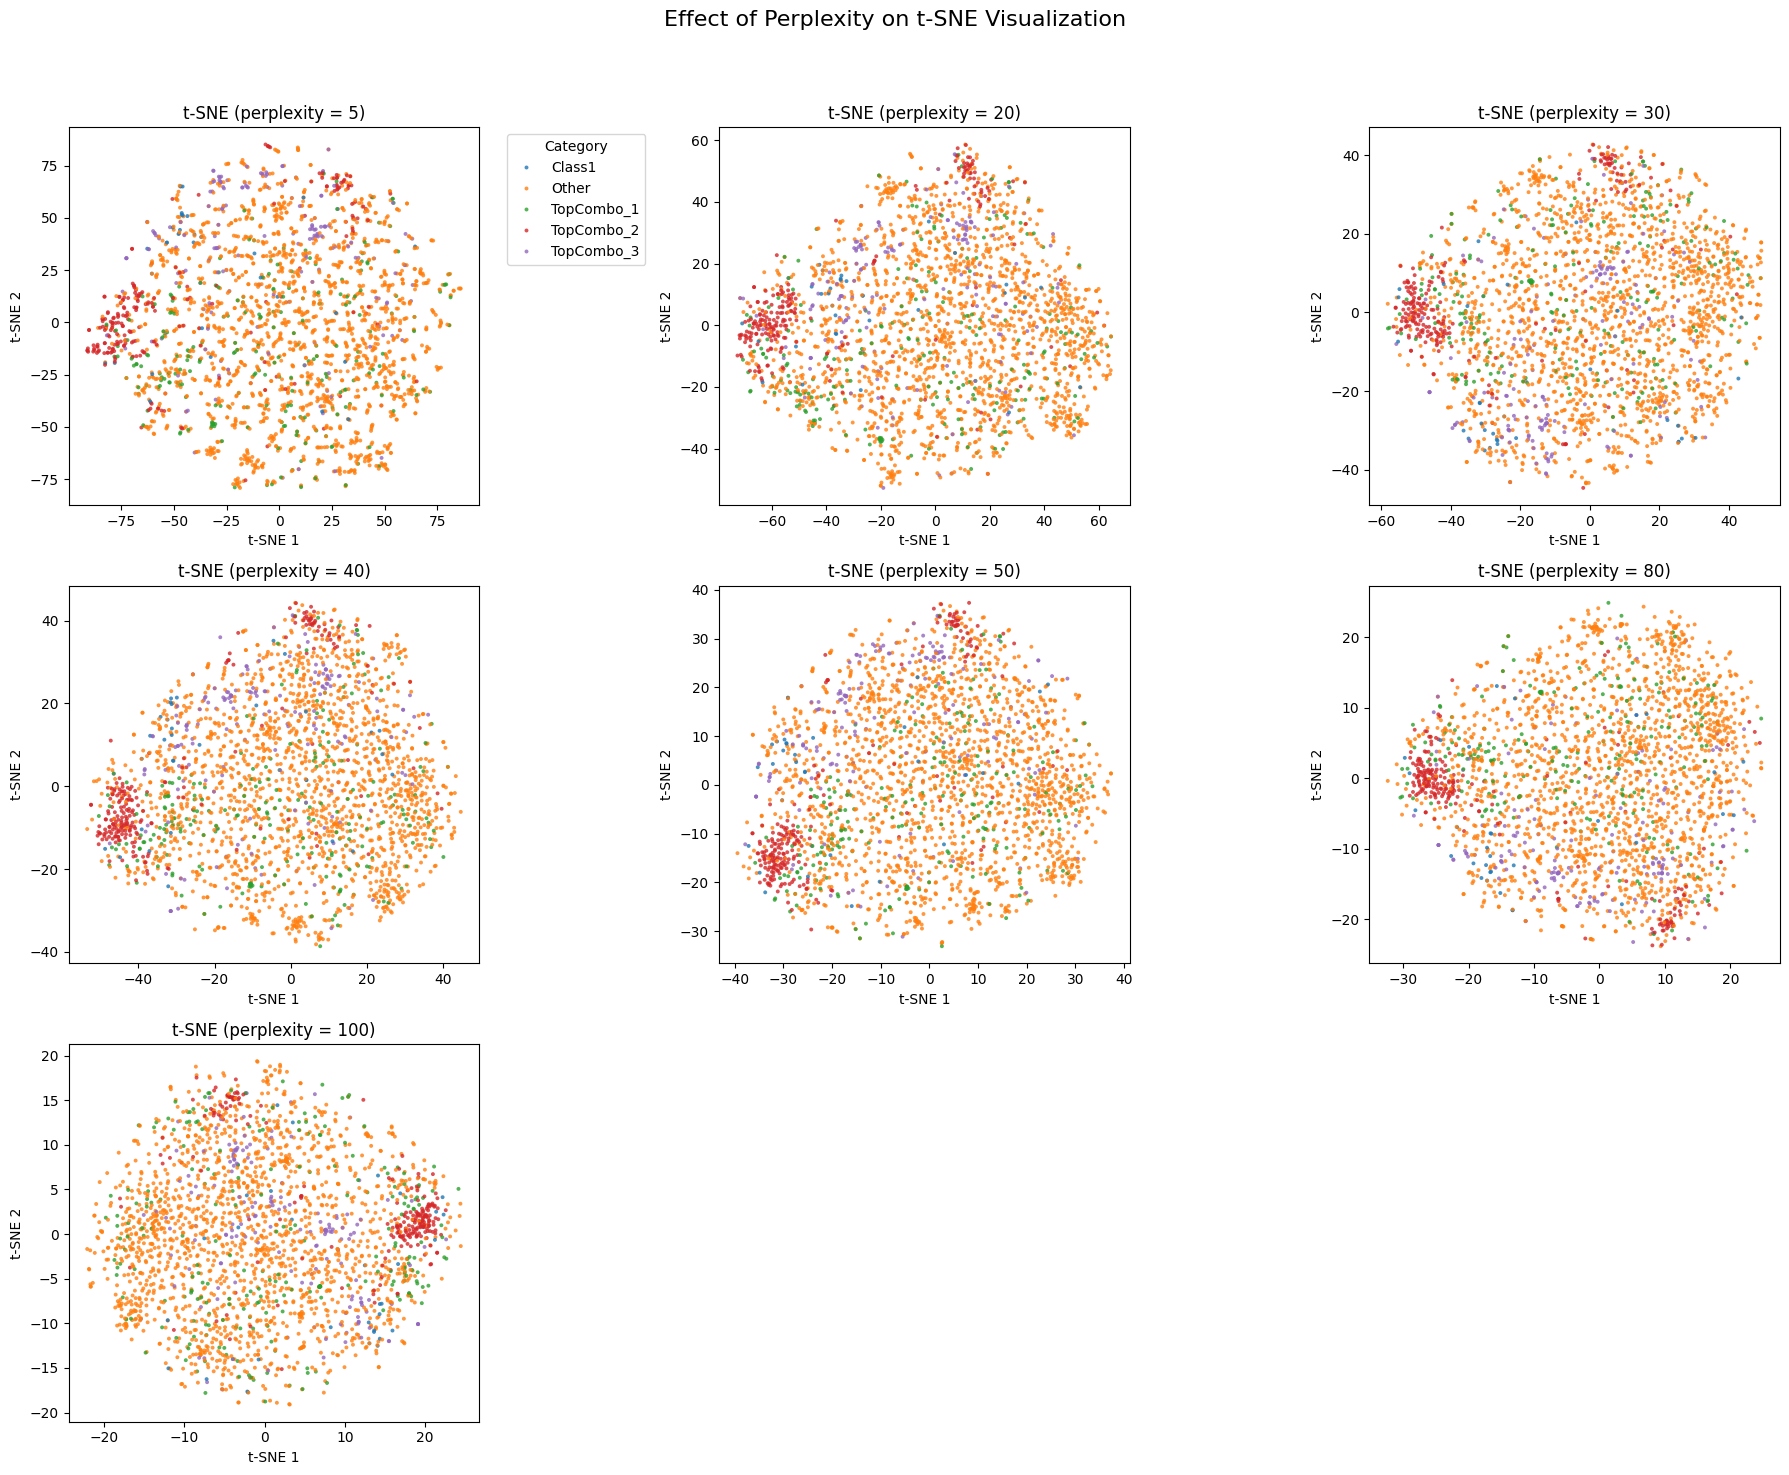

In [20]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math

# ensure X_scaled is contiguous float64
X_scaled = np.ascontiguousarray(X_scaled, dtype=np.float64)

# list of perplexities to compare
perplexities = [5, 20, 30, 40, 50, 80, 100]
tsne_results = {}

# compute t-SNE embeddings for each perplexity
for p in perplexities:
    tsne = TSNE(
        n_components=2,
        perplexity=p,
        learning_rate="auto",
        init="pca",
        method="barnes_hut",
        random_state=42
    )
    tsne_embedded = tsne.fit_transform(X_scaled)
    tsne_results[p] = tsne_embedded

# --- Visual comparison ---
n_plots = len(perplexities)
cols = 3  # number of columns
rows = math.ceil(n_plots / cols)

plt.figure(figsize=(6*cols, 5*rows))  # larger figure size

# Use highly distinct categorical palette
palette = sns.color_palette("tab10", n_colors=len(viz_category.unique()))
category_order = sorted(viz_category.unique())

for i, p in enumerate(perplexities, 1):
    plt.subplot(rows, cols, i)

    sns.scatterplot(
        x=tsne_results[p][:, 0],
        y=tsne_results[p][:, 1],
        hue=viz_category,
        palette=palette,
        s=8,               # smaller points for dense regions
        alpha=0.8,
        edgecolor="none",
        hue_order=category_order
    )
    plt.title(f"t-SNE (perplexity = {p})", fontsize=12)
    plt.xlabel("t-SNE 1", fontsize=10)
    plt.ylabel("t-SNE 2", fontsize=10)

    if i == 1:
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title="Category")
    else:
        plt.legend([], [], frameon=False)  # hide legend for other plots

plt.suptitle("Effect of Perplexity on t-SNE Visualization", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


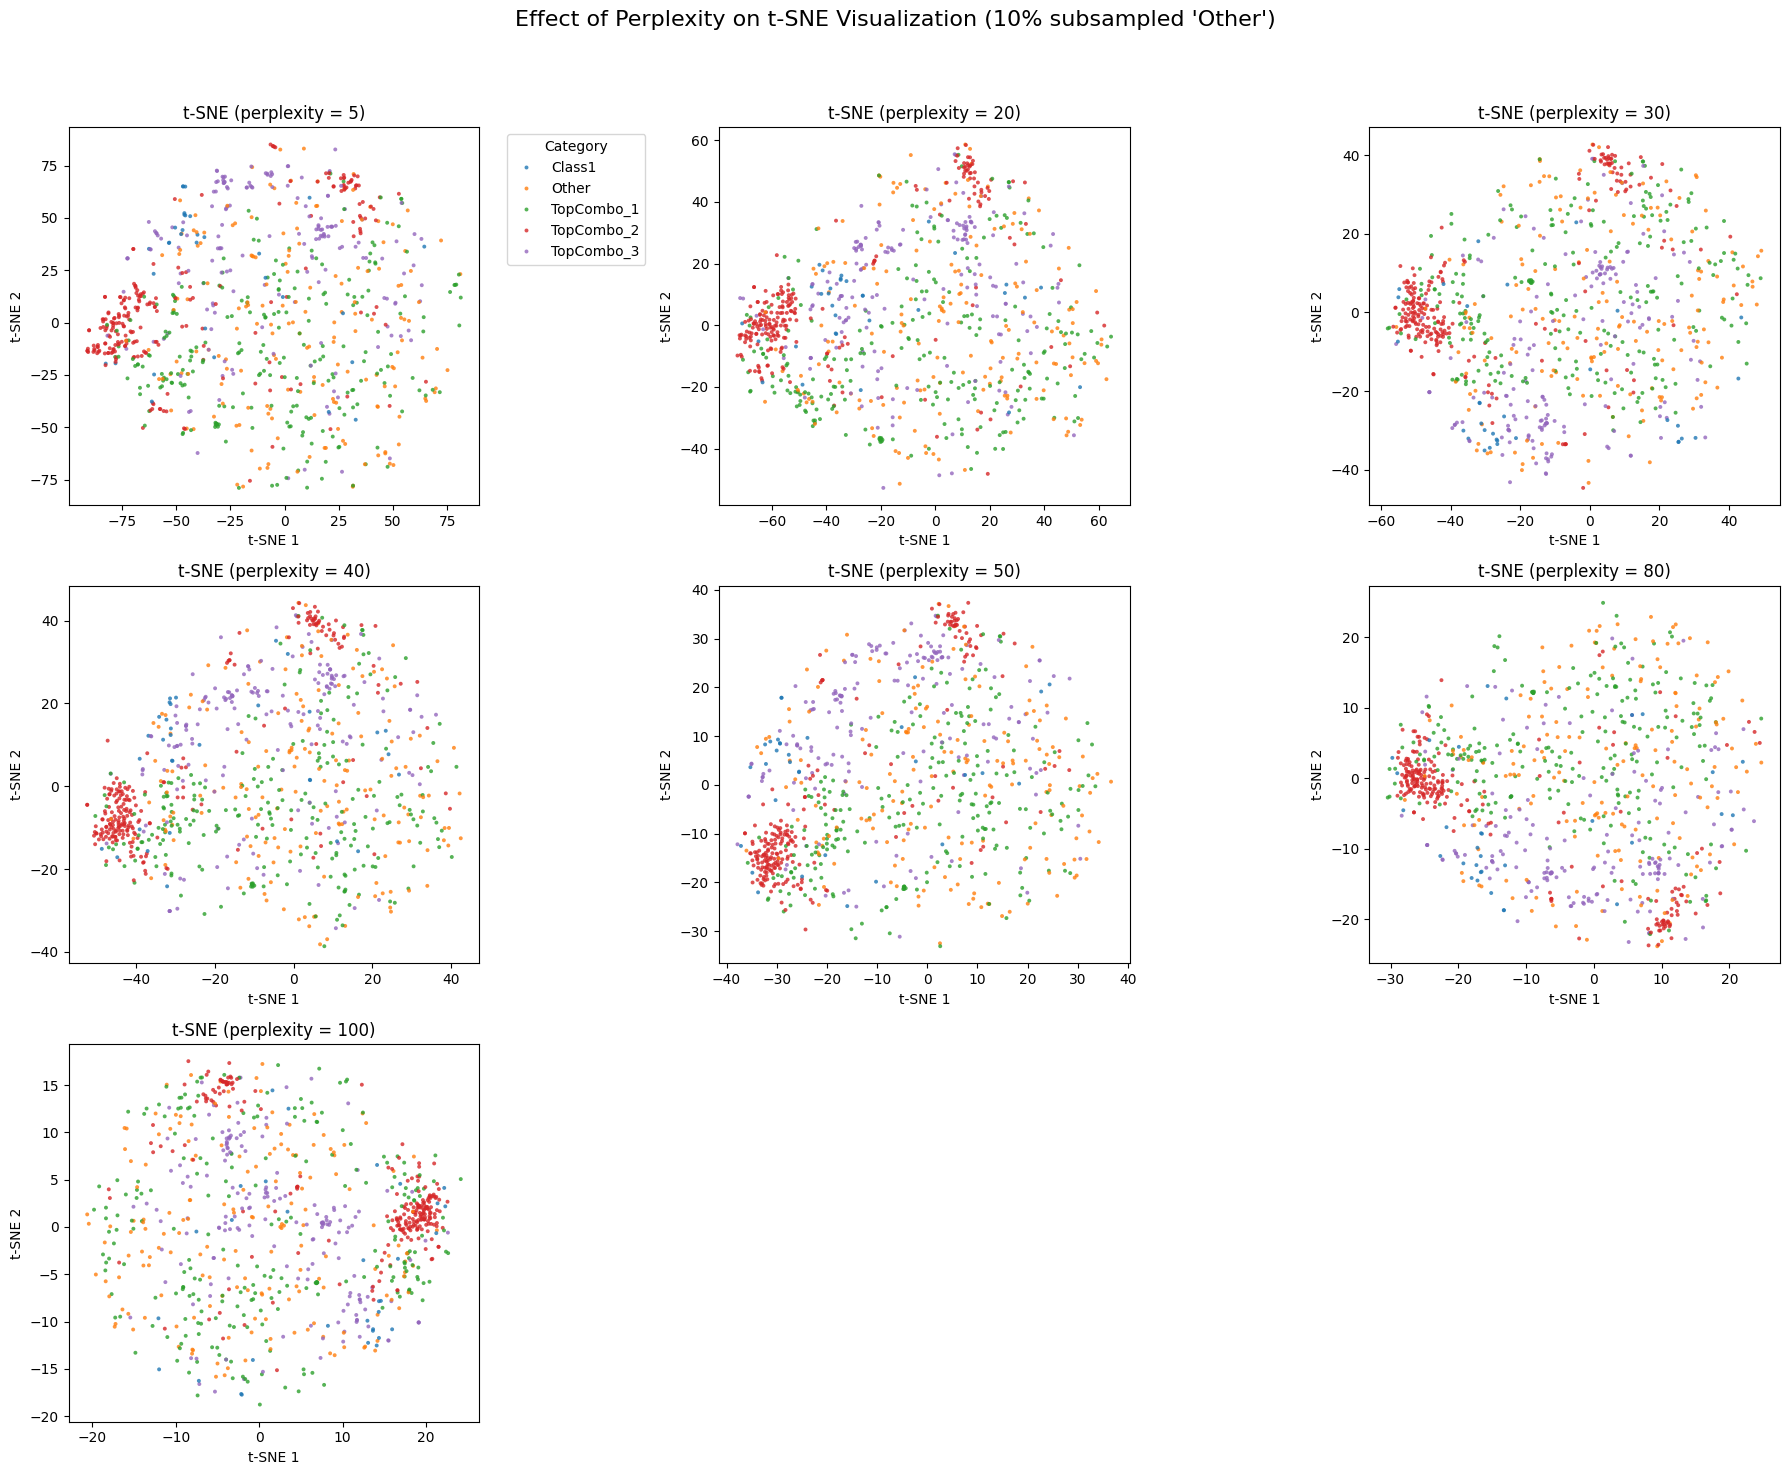

In [21]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math

# ensure X_scaled is contiguous float64
X_scaled = np.ascontiguousarray(X_scaled, dtype=np.float64)

# list of perplexities to compare
perplexities = [5, 20, 30, 40, 50, 80, 100]
tsne_results = {}

# compute t-SNE embeddings for each perplexity
for p in perplexities:
    tsne = TSNE(
        n_components=2,
        perplexity=p,
        learning_rate="auto",
        init="pca",
        method="barnes_hut",
        random_state=42
    )
    tsne_embedded = tsne.fit_transform(X_scaled)
    tsne_results[p] = tsne_embedded

# --- Subsample "Other" category ---
# keep all important categories, subsample 10% of "Other"
other_frac = 0.1
mask_other = viz_category == "Other"
mask_keep = ~mask_other.copy()  # keep all non-Other
other_indices = viz_category[mask_other].sample(frac=other_frac, random_state=42).index
mask_keep[other_indices] = True

# --- Visual comparison ---
n_plots = len(perplexities)
cols = 3
rows = math.ceil(n_plots / cols)

plt.figure(figsize=(6*cols, 5*rows))  # larger figure size

# Use distinct categorical palette
palette = sns.color_palette("tab10", n_colors=len(viz_category.unique()))
category_order = sorted(viz_category.unique())

for i, p in enumerate(perplexities, 1):
    plt.subplot(rows, cols, i)

    sns.scatterplot(
        x=tsne_results[p][mask_keep, 0],
        y=tsne_results[p][mask_keep, 1],
        hue=viz_category[mask_keep],
        palette=palette,
        s=8,              # smaller points
        alpha=0.8,
        edgecolor="none",
        hue_order=category_order
    )
    plt.title(f"t-SNE (perplexity = {p})", fontsize=12)
    plt.xlabel("t-SNE 1", fontsize=10)
    plt.ylabel("t-SNE 2", fontsize=10)

    if i == 1:
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title="Category")
    else:
        plt.legend([], [], frameon=False)

plt.suptitle("Effect of Perplexity on t-SNE Visualization (10% subsampled 'Other')", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


## t-SNE Perplexity Analysis for Optimal Visualization

A good t-SNE plot should reveal distinct clusters while preserving global structure.

### Key Criteria in the ideal case
- **Clear Cluster Separation:** Categories should form tight, well-separated clusters.  
- **Within-Cluster Cohesion:** Points within a category should be closely packed.  
- **Meaningful Global Structure:** Clusters should reflect high-dimensional relationships.  
- **Avoid Over-fragmentation:** Too low perplexity can split true clusters into too many small clusters centered around single points.  
- **Avoid "Ball-and-String" Effect:** Too high perplexity can create a crowded central mass.

### Observations by Perplexity
| Perplexity | Observations |
|------------|--------------|
| **5**  | Too low; clusters are fragmented and scattered and there are too many clisters for each class|
| **20** | Improved cohesion; clusters start separating. Global structure begins to emerge. |
| **30** | Better cluster especially for Top_Combo_2 here which is the 2nd most frequent combination of classes|
| **40 and 50** | Similar to 30, pruple is better clustered towards the top left compared to 30|
| **80 and 100** | Too high here as some clusters are not obvious as in 40 or 50.|

### Conclusion
The optimal perplexity is **30–50** range, here 40 is really good.


Looking a the perplxity = 40 plot, we make the following observations:

### Part B.3

1) Noisy/ambiguours labels (embedded within clusters of other colors):

The central region of the plot, especially the top middle and right middle regions are noisy as theere are multiple classes here (purple, yellow, green all mixed together).

2) Outliers:
Located on the far periphery of the pplot. x > 25 and y is 50 to 10 is an example. They are not clustering within the majority (maybe rare biological types)

3) Hard to learn samples:
Found in places where many colurs overalp with each other and there is no clear boundary. Examples are bottom right and top middle parts with (x from 10-20 and y from -5 to 5) and (x from 2 to 10 and y from 10 to 15). This could be some transitional states of genes.

In [37]:
# Part C: Isomap
from sklearn.manifold import Isomap
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Ensure X_scaled is contiguous float64
X_scaled = np.ascontiguousarray(X_scaled, dtype=np.float64)

# Use 5 nearest neighbors for Isomap (can tune this)
isomap = Isomap(n_neighbors=5, n_components=2)
X_isomap = isomap.fit_transform(X_scaled)

# Fundamental difference from t-SNE:
# - Isomap preserves **global structure** (geodesic distances along the manifold)
# - t-SNE preserves **local neighborhood structure** (focus on local clusters)


In [42]:
import pandas as pd

# Load the CSV
viz_category = pd.read_csv("/content/preprocessed/viz_category_new.csv")

# If the CSV has only one column, convert it to a Series
if viz_category.shape[1] == 1:
    viz_category = viz_category.iloc[:, 0]
else:
    # If multiple columns, pick the correct column, e.g., 'category'
    viz_category = viz_category['category']  # replace 'category' with your actual column name

# Now .unique() will work
palette = sns.color_palette("colorblind", n_colors=len(viz_category.unique()))
category_order = sorted(viz_category.unique())

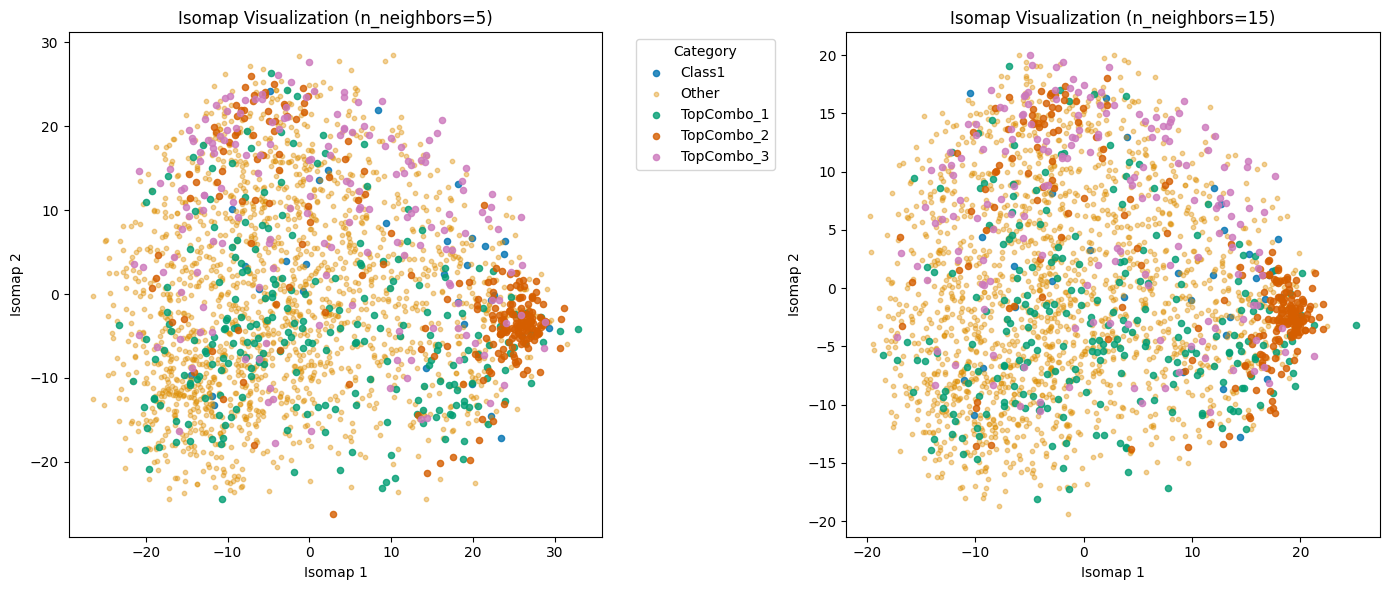

In [46]:
from sklearn.manifold import Isomap
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Ensure X_scaled is contiguous float64
X_scaled = np.ascontiguousarray(X_scaled, dtype=np.float64)

# Isomap settings
neighbors_list = [5, 15]
isomap_results = {}

# Compute Isomap embeddings
for n in neighbors_list:
    isomap = Isomap(n_neighbors=n, n_components=2)
    isomap_results[n] = isomap.fit_transform(X_scaled)

# Visualization
palette = sns.color_palette("colorblind", n_colors=len(viz_category.unique()))
category_order = sorted(viz_category.unique())

plt.figure(figsize=(14,6))

for i, n in enumerate(neighbors_list, 1):
    Z = isomap_results[n]
    plt.subplot(1, 2, i)

    # Plot each category separately
    for cat in category_order:
        idx = viz_category == cat
        if cat == "Other":
            plt.scatter(Z[idx,0], Z[idx,1], s=10, alpha=0.4,
                        color=palette[category_order.index(cat)], label=cat)
        else:
            plt.scatter(Z[idx,0], Z[idx,1], s=20, alpha=0.8,
                        color=palette[category_order.index(cat)], label=cat)

    plt.title(f"Isomap Visualization (n_neighbors={n})")
    plt.xlabel("Isomap 1")
    plt.ylabel("Isomap 2")

    # Only show legend on the first subplot
    if i == 1:
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title="Category")
    else:
        plt.legend([], [], frameon=False)

plt.tight_layout()
plt.show()


Isomap 1 and 2 represent the first two dimensions respectivvely.

# Isomap vs t-SNE: Global vs Local Perspectives
Smaller n_neighboursin isomap - local neihbourhood, larger n_neighbours: global manifold structure.

Both **Isomap** and **t-SNE** are non-linear dimensionality reduction techniques for visualizing high-dimensional data, but they also have differences in what structure they preserve as shown below:

---

## Isomap: Capturing Global Structure
- **Goal:** Preserve **global manifold geometry**.  
- **Method:**  
  1. Construct a **neighborhood graph** for each data point.  
  2. Estimate **geodesic distances** (shortest path along the manifold).  
  3. Apply **Multidimensional Scaling (MDS)** to embed in 2D/3D.  
- **Strengths:**  
  - Maintains the **overall layout** of data.  
  - Reveals **large-scale relationships** between clusters.  
- **Weaknesses:**  
  - May lose **fine local details** in complex manifolds.  

---

## t-SNE: Preserving Local Neighborhoods
- **Goal:** Maintain **local similarities** between nearby points.  
- **Method:**  
  1. Convert Euclidean distances into **probabilities representing similarity**.  
  2. Optimize a low-dimensional map to match these probabilities.  
- **Strengths:**  
  - Excellent for **cluster discovery** and visualizing local structure.  
- **Weaknesses:**  
  - Distorts **global distances**; relative positions of clusters may be misleading.  

---

## Quick Comparison

| Feature           | Isomap                    | t-SNE                        |
|------------------|---------------------------|-------------------------------|
| Focus            | Global structure          | Local neighborhoods           |
| Distance Metric  | Geodesic distance         | Probabilistic local similarity|
| Strengths        | Captures manifold shape   | Reveals fine cluster structure|
| Weaknesses       | Loses local detail        | Distorts global structure     |

---

**Takeaway:**  
- Use **Isomap** when overall relationships and manifold geometry matter.  
- Use **t-SNE** when discovering and visualizing **tight clusters** is the priority.  

### Part C.3:

# Isomap vs t-SNE: Visualizing Gene Expression Data

Dimensionality reduction helps visualize high-dimensional data like gene expression. **Isomap** and **t-SNE** are two popular non-linear methods with different focuses.

---

## Isomap: Global Structure
- **Goal:** Preserve the **overall manifold geometry**.  
- **Method:** Computes **geodesic distances** (shortest paths along the data manifold) and embeds points using **MDS**.  
- **Observation:** The Isomap plot shows a **continuous, sweeping distribution** of points.  
- **Implication:** Captures **large-scale relationships** between categories, making global patterns visible.

---

## t-SNE: Local Structure
- **Goal:** Preserve **local neighborhood relationships**.  
- **Observation:** Forms **tight, well-separated clusters**, e.g., TopCombo_2.  
- **Limitation:** Distances between clusters are **not globally meaningful**; global geometry is distorted.

---

## Comparison
| Aspect           | Isomap                  | t-SNE                        |
|-----------------|------------------------|-------------------------------|
| Focus            | Global structure       | Local neighborhoods           |
| Strengths        | Reveals manifold shape | Reveals tight clusters        |
| Weaknesses       | May miss fine local details | Distorts global layout   |

**Takeaway:** For understanding **overall gene distribution**, Isomap is superior. For **cluster detection**, t-SNE is ideal.

---

## Data Manifold & Classification Difficulty
- Gene expression data lies on a **curved, complex manifold**.  
- In Isomap, categories like Class1, TopCombos, and Other are **intermingled**, showing significant overlap.  
- **Implication for classification:**  
  - Linear classifiers will struggle.  
  - Accurate classification requires **non-linear decision boundaries** that respect the manifold's shape.  

**Conclusion:** Isomap reveals the **global structure and manifold complexity**, while t-SNE excels at **local clustering**. Together, they provide a complete picture of the data.


SyntaxError: unterminated string literal (detected at line 40) (ipython-input-2836949013.py, line 40)